In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Distribuciones Discretas en Python

## Distribución Uniforme

Modela experimentos aleatorios cuyos resultados son categóricos y equiprobables. Por ejemplo:
* "Lanzar un dado (no trucado) y ver qué cara sale".
* "Lanzar una moneda y ver qué lado queda a la vista". 

Para facilitar el tratamiento como variable aleatoria, a cada resultado posible se le asigna una etiqueta numérica (entero positivo): 
* En el caso del dado, se asigna a cada cara uno de los números 1 al 6
* En el caso de la moneda, se asigna el 0 a la cruz y 1 a la cara

In [2]:
randint = stats.randint

In [3]:
a=1; b=7 # fmp = 1/(b-a) fmp -> Función de masa de probabilidad
print('Probabilidad de cada resultado: ', 1/(b-a))

Probabilidad de cada resultado:  0.16666666666666666


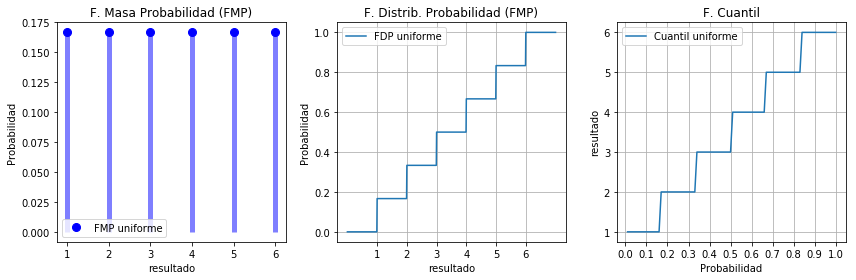

In [4]:
plt.figure(figsize=(12,4))

# Visualizar Función de Masa de Probabilidad (FMP)
plt.subplot(1,3,1)
x = np.arange(a,b)
plt.plot(x, randint.pmf(x, low=a, high=b), 'bo', ms=8, label='FMP uniforme')
plt.vlines(x, 0, randint.pmf(x, low=a, high=b), colors='b', lw=5, alpha=0.5)
plt.legend(loc='best', frameon=True), plt.title('F. Masa Probabilidad (FMP)')
plt.xlabel('resultado'), plt.ylabel('Probabilidad')
ax = plt.gca() 
ax.set_xticks(x)

# Visualizar Función de Distribución de Probabilidad (FDP)
plt.subplot(1,3,2), 
step_x = .01 
x = np.arange(a-1,b+step_x,step_x)
plt.plot(x, randint.cdf(x, low=a, high=b), label='FDP uniforme'), plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Distrib. Probabilidad (FMP)'),
plt.xlabel('resultado'), plt.ylabel('Probabilidad')
ax = plt.gca() 
ax.set_xticks(np.arange(a,b))

# Visualizar Función Cuantil (inversa de FDP) - Función Punto Porcentual
plt.subplot(1,3,3), 
x = np.linspace(0.01,1,100, endpoint=True)
plt.plot(x, randint.ppf(x, low=a, high=b), label='Cuantil uniforme'), plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Cuantil'),
plt.xlabel('Probabilidad'), plt.ylabel('resultado')
ax = plt.gca() 
ax.set_xticks(np.linspace(0.0,1,11, endpoint=True))

plt.tight_layout()

Momentos: media, varianza, asimetría y curtosis

In [5]:
media, var, asimet, kurt = randint.stats(low=a, high=b, moments='mvsk')
print('media = ', media, '\nvarianza = ', var, 
      '\ncoef. asimetría = ', asimet, '\ncoef. curtosis =', kurt)

media =  3.5 
varianza =  2.9166666666666665 
coef. asimetría =  0.0 
coef. curtosis = -1.2685714285714285


Mediana y media

In [6]:
randint.median(low=a, high=b), randint.mean(low=a, high=b)

(3.0, 3.5)

Desviación típica y varianza

In [7]:
randint.std(low=a, high=b), randint.var(low=a, high=b)

(1.707825127659933, 2.9166666666666665)

Entropía

In [8]:
randint.entropy(low=a, high=b)

array(1.79175947)

### Experimentación: pruebas equiprobables

Lanzamiento de un dado y ver qué cara (número) sale

* 1 vez

In [9]:
randint.rvs(low=a, high=b, loc=0, size=1, random_state=None)

array([2])

* 100 veces -> secuencia aleatoria independiente

In [10]:
seq = randint.rvs(low=a, high=b, loc=0, size=100, random_state=None)
print('Secuencia: ', seq)

Secuencia:  [5 6 3 5 3 4 1 2 2 5 1 5 4 4 3 2 4 6 4 1 5 6 2 5 5 5 6 5 6 6 6 6 1 2 1 1 5
 2 2 3 4 3 1 3 4 6 6 5 2 4 1 1 5 2 6 2 6 6 1 1 6 6 6 3 1 1 6 5 3 6 4 5 5 4
 5 2 3 5 1 6 3 2 1 2 3 6 4 2 5 3 3 3 3 6 6 1 2 3 2 4]


In [11]:
print('Probabilidades: ', np.bincount(seq)[1:]/100)
print('Media: ', seq.mean(), '   Desviación típica: ', seq.std())

Probabilidades:  [0.16 0.16 0.16 0.12 0.18 0.22]
Media:  3.66    Desviación típica:  1.7844887222955488


* 1.000 veces -> secuencia aleatoria independiente

In [12]:
seq = randint.rvs(low=a, high=b, loc=0, size=1000, random_state=None)
print('Probabilidades: ', np.bincount(seq)[1:]/1000)
print('Media: ', seq.mean(), '   Desviación típica: ', seq.std())

Probabilidades:  [0.161 0.168 0.169 0.166 0.162 0.174]
Media:  3.522    Desviación típica:  1.7086591234064215


* 10.000 veces -> secuencia aleatoria independiente

In [13]:
seq = randint.rvs(low=a, high=b, loc=0, size=10000, random_state=None)
print('Probabilidades: ', np.bincount(seq)[1:]/10000)
print('Media: ', seq.mean(), '   Desviación típica: ', seq.std())

Probabilidades:  [0.1635 0.162  0.1734 0.1725 0.1599 0.1687]
Media:  3.5094    Desviación típica:  1.6990914160221045


* 100.000 veces  -> secuencia aleatoria independiente

In [14]:
seq = randint.rvs(low=a, high=b, loc=0, size=100000, random_state=None)
print('Probabilidades: ', np.bincount(seq)[1:]/100000)
print('Media: ', seq.mean(), '   Desviación típica: ', seq.std())

Probabilidades:  [0.16698 0.16622 0.1682  0.16718 0.16695 0.16447]
Media:  3.49431    Desviación típica:  1.7044082914313696


* 1.000.000 veces -> secuencia aleatoria independiente

In [15]:
seq = randint.rvs(low=a, high=b, loc=0, size=1000000, random_state=None)
print('Probabilidades: ', np.bincount(seq)[1:]/1000000)
print('Media: ', seq.mean(), '   Desviación típica: ', seq.std())

Probabilidades:  [0.167208 0.166254 0.166176 0.166547 0.1663   0.167515]
Media:  3.501022    Desviación típica:  1.7098084557973148


## Distribución de Bernoulli (y categórica general)

Se generaliza la distribución uniforme asumiendo que las probabilidades pueden ser arbitrarias.

En el caso de sólo dos resultados posibles, estamos ante una **prueba o ensayo de Bernoulli**. Por lo general se considera un resultado acertar (se le suele asignar valor 1), con probabilidad p, y otro resultado fallar (se le suele asignar valor 0), con probabilidad q = 1-p 

In [16]:
bernoulli = stats.bernoulli
p = .7
print('Probabilidad de acertar, p = ', p, '   Probabilidad de fallar q = 1-p = ', 1-p)

Probabilidad de acertar, p =  0.7    Probabilidad de fallar q = 1-p =  0.30000000000000004


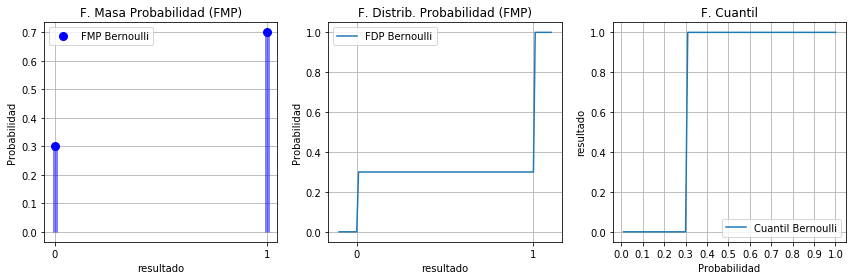

In [17]:
plt.figure(figsize=(12,4))

# Visualizar Función de Masa de Probabilidad (FMP)
plt.subplot(1,3,1)
x = [0, 1]
plt.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='FMP Bernoulli')
plt.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5), plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Masa Probabilidad (FMP)')
plt.xlabel('resultado'), plt.ylabel('Probabilidad')
ax = plt.gca() 
ax.set_xticks(x)

# Visualizar Función de Distribución de Probabilidad (FDP)
plt.subplot(1,3,2), 
step_x = .01 
x = np.arange(-10*step_x,1+10*step_x,step_x)
plt.plot(x, bernoulli.cdf(x, p), label='FDP Bernoulli'), plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Distrib. Probabilidad (FMP)'),
plt.xlabel('resultado'), plt.ylabel('Probabilidad')
ax = plt.gca() 
ax.set_xticks([0,1])

# Visualizar Función Cuantil (inversa de FDP) - Función Punto Porcentual
plt.subplot(1,3,3), 
x = np.linspace(0.01,1,100, endpoint=True)
plt.plot(x, bernoulli.ppf(x, p), label='Cuantil Bernoulli'), plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Cuantil'),
plt.xlabel('Probabilidad'), plt.ylabel('resultado')
ax = plt.gca() 
ax.set_xticks(np.linspace(0.0,1,11, endpoint=True))

plt.tight_layout()

Momentos: media, varianza, asimetría y curtosis

In [18]:
media, var, asimet, kurt = bernoulli.stats(p, moments='mvsk')
print('media = ', media, '\nvarianza = ', var, 
      '\ncoef. asimetría = ', asimet, '\ncoef. curtosis =', kurt)

media =  0.7 
varianza =  0.21000000000000002 
coef. asimetría =  -0.8728715609439686 
coef. curtosis = -1.238095238095243


Mediana y media

In [19]:
bernoulli.median(p), bernoulli.mean(p)

(1.0, 0.7)

Desviación típica y varianza

In [20]:
bernoulli.std(p), bernoulli.var(p)

(0.45825756949558405, 0.21000000000000002)

Entropía

In [21]:
bernoulli.entropy(p)

array(0.6108643)

### Experimentación: pruebas de Bernoulli

* Lanzamiento de una moneda trucada (cruz -0-: 70%, cara -1-: 30%) - acertar es que salga cara

In [22]:
bernoulli.rvs(p)

1

* Lanzamiento de una moneda 100 veces -> secuencia independiente

In [23]:
seq = bernoulli.rvs(p, loc=0, size=100, random_state=None)
print('Secuencia: ', seq)

Secuencia:  [0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0]


In [24]:
print('Probabilidades: ', np.bincount(seq)/100)
print('Media: ', seq.mean(), '   Desviación típica: ', seq.std())

Probabilidades:  [0.26 0.74]
Media:  0.74    Desviación típica:  0.4386342439892262


* Lanzamiento de una moneda 10.000 veces -> secuencia independiente

In [25]:
seq = bernoulli.rvs(p, loc=0, size=10000, random_state=None)
print('Probabilidades: ', np.bincount(seq)/10000)
print('Media: ', seq.mean(), '   Desviación típica: ', seq.std())

Probabilidades:  [0.3033 0.6967]
Media:  0.6967    Desviación típica:  0.45968370647652934


## Distribución Binomial

Se repite n veces una **prueba o ensayo de Bernoulli**, cada una con probabilidad de acierto p, y probabilidad de fallo q = 1-p y se cuenta el número de aciertos k. 

Esta repetición suele llamarse **ensayo compuesto de Bernoulli**, y el número de aciertos de modela con una VA Binomial.

In [26]:
binom = stats.binom
n, p = 5, .7
FMP = np.array([1-p, p])
print('Probabilidad de acertar cada prueba de Bernoulli, p = ', p, 
      '\nProbabilidad de fallar cada prueba de Bernoulli q = 1-p = ', 1-p,
      '\nFMP de cada Prueba de Bernoulli: ', FMP,
      '\nProbabilidades de los números de aciertos en el ensayo compuesto:',
      '\n(FMP Binomial ', n, ' pruebas)\n', 
      binom.pmf(np.arange(n+1),n,p))

Probabilidad de acertar cada prueba de Bernoulli, p =  0.7 
Probabilidad de fallar cada prueba de Bernoulli q = 1-p =  0.30000000000000004 
FMP de cada Prueba de Bernoulli:  [0.3 0.7] 
Probabilidades de los números de aciertos en el ensayo compuesto: 
(FMP Binomial  5  pruebas)
 [0.00243 0.02835 0.1323  0.3087  0.36015 0.16807]


### Construcción con suma de variables aleatorias

El número de aciertos lo obtenemos sumando el resultado de cada prueba de Bernoulli. Se trata, por tanto, de una VA que es suma de cada una de las VAs con el resultado de cada una de dichas pruebas.

**Teorema**: la suma de VAs independientes es una nueva VA cuya FMP se obtiene mediante la convolución de las FMPs de las VAs que se suman.

In [27]:
resul = 1
for i in range(n):
    resul = np.convolve(FMP, resul)
    print(resul)

[0.3 0.7]
[0.09 0.42 0.49]
[0.027 0.189 0.441 0.343]
[0.0081 0.0756 0.2646 0.4116 0.2401]
[0.00243 0.02835 0.1323  0.3087  0.36015 0.16807]


¡La convolución resultante es la FMP Binomial que acabamos de ver más arriba!

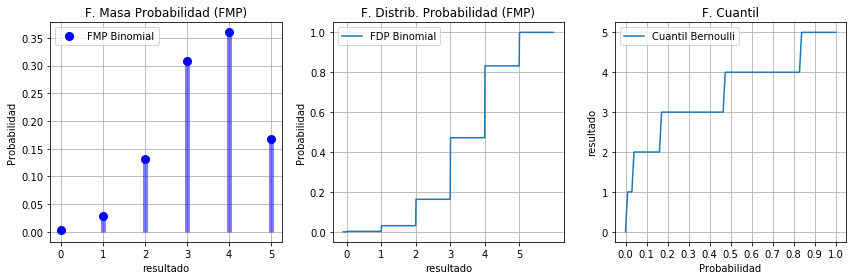

In [28]:
plt.figure(figsize=(12,4))

# Visualizar Función de Masa de Probabilidad (FMP)
plt.subplot(1,3,1)
k = np.arange(n+1)
plt.plot(k, binom.pmf(k, n, p), 'bo', ms=8, label='FMP Binomial')
plt.vlines(k, 0, binom.pmf(k, n, p), colors='b', lw=5, alpha=0.5), plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Masa Probabilidad (FMP)')
plt.xlabel('resultado'), plt.ylabel('Probabilidad')
ax = plt.gca() 
ax.set_xticks(k)

# Visualizar Función de Distribución de Probabilidad (FDP)
plt.subplot(1,3,2), 
step_x = .01 
x = np.arange(-10*step_x, n+1,step_x)
plt.plot(x, binom.cdf(x, n, p), label='FDP Binomial'), plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Distrib. Probabilidad (FMP)'),
plt.xlabel('resultado'), plt.ylabel('Probabilidad')
ax = plt.gca() 
ax.set_xticks(k)

# Visualizar Función Cuantil (inversa de FDP) - Función Punto Porcentual
plt.subplot(1,3,3), 
x = np.linspace(0.000001,1,100, endpoint=True)
plt.plot(x, binom.ppf(x, n, p), label='Cuantil Bernoulli'), plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Cuantil'),
plt.xlabel('Probabilidad'), plt.ylabel('resultado')
ax = plt.gca() 
ax.set_xticks(np.linspace(0.0,1,11, endpoint=True))

plt.tight_layout()

Momentos: media, varianza, asimetría y curtosis

In [29]:
media, var, asimet, kurt = binom.stats(n,p, moments='mvsk')
print('media = ', media, '\nvarianza = ', var, 
      '\ncoef. asimetría = ', asimet, '\ncoef. curtosis =', kurt)

media =  3.5 
varianza =  1.0500000000000003 
coef. asimetría =  -0.39036002917941315 
coef. curtosis = -0.24761904761904757


Mediana y media

In [30]:
binom.median(n,p), binom.mean(n,p)

(4.0, 3.5)

Desviación típica y varianza

In [31]:
binom.std(n,p), binom.var(n,p)

(1.02469507659596, 1.0500000000000003)

Entropía

In [32]:
binom.entropy(n,p)

array(1.41361486)

### Experimentación: pruebas repetidas de Bernoulli

In [58]:
n, p = 5, .7
seq = bernoulli.rvs(p, loc=0, size=n, random_state=None)
print('Resultados prueba repetida Bernoulli: ', seq, ' -> ', seq.sum(), ' aciertos')

Resultados pruueba repetida Bernoulli:  [1 1 0 1 0]  ->  3  aciertos


**Estimación de p por Máxima Verosimilitud (MLE)**

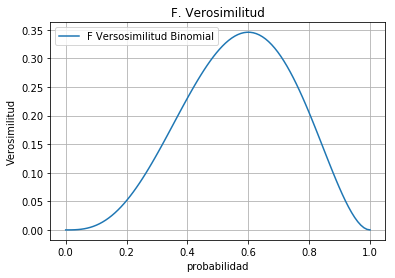

In [59]:
pp = np.linspace(0,1,100,endpoint=True)
mle = binom.pmf(seq.sum(), n, pp)

plt.plot(pp, mle, label='F Versosimilitud Binomial'), plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Verosimilitud'),
plt.xlabel('probabilidad'), plt.ylabel('Verosimilitud')
ax = plt.gca() 
#ax.set_xticks(k);


* Reiteramos 10 veces la prueba repetida de Bernoulli

In [34]:
for i in range(11):
    seq = bernoulli.rvs(p, loc=0, size=n, random_state=None)
    print('Resultados prueba repetida Bernoulli: ', seq, ' -> ', seq.sum(), ' aciertos')

Resultados prueba repetida Bernoulli:  [1 1 1 1 1]  ->  5  aciertos
Resultados prueba repetida Bernoulli:  [1 1 1 1 1]  ->  5  aciertos
Resultados prueba repetida Bernoulli:  [1 0 1 1 1]  ->  4  aciertos
Resultados prueba repetida Bernoulli:  [1 1 1 0 1]  ->  4  aciertos
Resultados prueba repetida Bernoulli:  [1 0 1 1 1]  ->  4  aciertos
Resultados prueba repetida Bernoulli:  [1 1 1 1 1]  ->  5  aciertos
Resultados prueba repetida Bernoulli:  [0 0 0 0 0]  ->  0  aciertos
Resultados prueba repetida Bernoulli:  [1 0 1 1 1]  ->  4  aciertos
Resultados prueba repetida Bernoulli:  [1 1 1 1 1]  ->  5  aciertos
Resultados prueba repetida Bernoulli:  [1 1 1 1 1]  ->  5  aciertos
Resultados prueba repetida Bernoulli:  [0 0 1 1 1]  ->  3  aciertos


* Reiteramos N = 1000 veces y estimamos probabilidades y estadísticos

(comparar con valores teóricos, vistos más arriba)

In [35]:
N = 10000
seq=np.zeros((N,n),dtype='int64')
for i in range(N):
    seq[i]=bernoulli.rvs(p, loc=0, size=n, random_state=None)

In [36]:
print('Probabilidades: ', np.bincount(seq.sum(1))/N)
print('Media: ', seq.sum(1).mean(), '   Desviación típica: ', seq.sum(1).std())

Probabilidades:  [0.0033 0.0268 0.1245 0.3106 0.3594 0.1754]
Media:  3.5222    Desviación típica:  1.024552175342964


## Distribución de Poisson

Modela el número de ocurrencias independientes (una ocurrencia no afecta a la siguiente) de un suceso en un intervalo temporal o espacial determinado, considerándose un valor medio &lambda; de ocurrencias fijo o, equivalentemente,una tasa constante de ocurrencias. Si se preporciona una tasa *r* y un intervalo *t*, $$\lambda = r t$$ 

Correspond;e al caso límite de un ensayo repetido de Bernoulli, cuando el número de repticiones n es muy grande y la probabilidad de acierto muy pequeña, pero se mantiene constante el producto de ambos $$\lambda = pn$$ 

In [38]:
poisson = stats.poisson
lda = 5

poisson.pmf(range(10),lda)

array([0.00673795, 0.03368973, 0.08422434, 0.1403739 , 0.17546737,
       0.17546737, 0.14622281, 0.10444486, 0.06527804, 0.03626558])

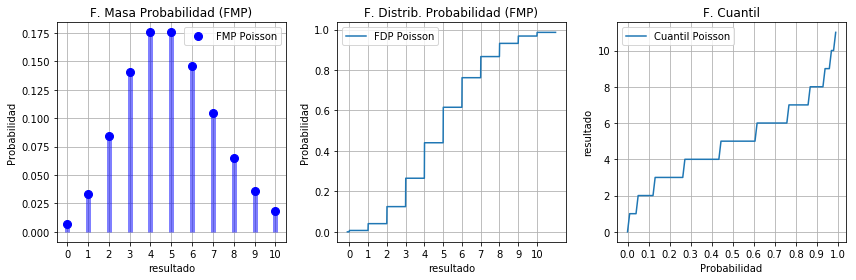

In [41]:
n=10
plt.figure(figsize=(12,4))

# Visualizar Función de Masa de Probabilidad (FMP)
plt.subplot(1,3,1)
k = np.arange(n+1)
plt.plot(k, poisson.pmf(k, lda), 'bo', ms=8, label='FMP Poisson')
plt.vlines(k, 0, poisson.pmf(k, lda), colors='b', lw=5, alpha=0.5), plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Masa Probabilidad (FMP)')
plt.xlabel('resultado'), plt.ylabel('Probabilidad')
ax = plt.gca() 
ax.set_xticks(k);

# Visualizar Función de Distribución de Probabilidad (FDP)
plt.subplot(1,3,2), 
step_x = .01 
x = np.arange(-10*step_x, n+1,step_x)
plt.plot(x, poisson.cdf(x, lda), label='FDP Poisson'), plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Distrib. Probabilidad (FMP)'),
plt.xlabel('resultado'), plt.ylabel('Probabilidad')
ax = plt.gca() 
ax.set_xticks(k);

# Visualizar Función Cuantil (inversa de FDP) - Función Punto Porcentual
plt.subplot(1,3,3), 
x = np.linspace(0.000001,1,100, endpoint=True)
plt.plot(x, poisson.ppf(x, lda), label='Cuantil Poisson'), plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Cuantil'),
plt.xlabel('Probabilidad'), plt.ylabel('resultado')
ax = plt.gca() 
ax.set_xticks(np.linspace(0.0,1,11, endpoint=True))

plt.tight_layout()

Momentos: media, varianza, asimetría y curtosis

In [42]:
media, var, asimet, kurt = poisson.stats(lda, moments='mvsk')
print('media = ', media, '\nvarianza = ', var, 
      '\ncoef. asimetría = ', asimet, '\ncoef. curtosis =', kurt)

media =  5.0 
varianza =  5.0 
coef. asimetría =  0.4472135954999579 
coef. curtosis = 0.2


Mediana y media

In [43]:
poisson.median(lda), poisson.mean(n,p)

(5.0, 10.7)

Desviación típica y varianza

In [45]:
poisson.std(n,p), poisson.var(n,p)

(3.1622776601683795, 10.0)

Entropía

In [46]:
poisson.entropy(n,p)

array(2.56140994)

## Experimentación: distribución de Poisson

In [70]:
lda, n = 5, 1
seq = poisson.rvs(lda, loc=0, size=n, random_state=None)
print('Resultados experimento Poisson: ', seq, ' aciertos')

Resultados experimento Poisson:  [7]  aciertos


**Estimación de &lambda; por máxima verosilmilitud**

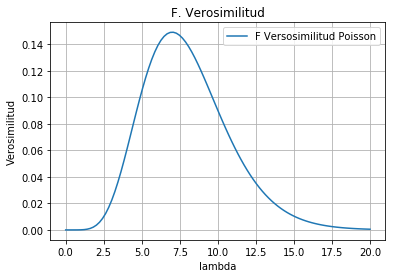

In [72]:
pp = np.linspace(0,20,100,endpoint=True)
mle = poisson.pmf(seq, pp)

plt.plot(pp, mle, label='F Versosimilitud Poisson'), plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Verosimilitud'),
plt.xlabel('lambda'), plt.ylabel('Verosimilitud')
ax = plt.gca() 
#ax.set_xticks(k);